**ML formulation of business problem**

We can take it as a multilabel classification problem. As each story indicates to one or many types of abuse. Machine learning models can help organisations to categorize these stories. 
There are multiple ways to predict multilabel classifications. Binary Relevance, Classifier Chains and Label Powerset. 

**Business constraint**
As it is research data so latency is not so much important but as we will work on text data so dimension would be very high, hence, models should be simple to get good accuracy and if we are able to interpret it, will be best.


In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import seaborn 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import os
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# data_source = "https://github.com/swkarlekar/safecity/tree/master/multilabel_classification"

In [2]:
# data upload with help of curlwget tool
# and uploading data to colab directly
# for now I loading only training data to do EDA
#The data is already filtered and cleaned

!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://github.com/swkarlekar/safecity/blob/master/multilabel_classification/train.csv.zip" "https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/train.csv.zip" -c -O 'train.csv.zip'

--2021-07-23 00:58:56--  https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/train.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328980 (321K) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip       100%[===================>] 321.27K  --.-KB/s    in 0.04s   

2021-07-23 00:58:56 (8.63 MB/s) - ‘train.csv.zip’ saved [328980/328980]



In [3]:
# Unziping file

!unzip train.csv.zip


Archive:  train.csv.zip
  inflating: train.csv               


In [4]:
# checkiing currect directly 
# %cd /content
%ls

sample_data/  train.csv  train.csv.zip


In [5]:
os.listdir() #checking files in currect location/ directory

['.config', 'train.csv.zip', 'train.csv', 'sample_data']

In [6]:
data = pd.read_csv("train.csv")

In [7]:
print(data["Description"].values[10:20])

['Catcalls and passing comments were two of the ghastly things the Delhi police at the International Airport put me and my friend through. It is appalling that the protectors and law enforcers at the airport can make someone so uncomfortable.'
 "This happened in a bus, public transport. It was in broad daylight. I was on my way to college and the bus wasn't that crowded. There was enough space for two people to stand back to back with big bags on 'em. This particular male was standing next to my seat. There was enough and more space behind him. But noooooo... He started rubbing his crotch against my shoulder, subtly at first and then very obviously. I made my discomfort very apparent. But he didn't seem to get it. I shifted inside my seat and so did he. I think the lady beside me knew what was going on but didn't say a word, neither did the people behind me nor the bus conductor. Well neither did i in the first place, i was frozen and gripped in shock and fear. I think now i am better 

In [10]:
print(data.shape)   #checking shape of data
print(data.columns)  #printing all columns name

(7201, 4)
Index(['Description', 'Commenting', 'Ogling/Facial Expressions/Staring',
       'Touching /Groping'],
      dtype='object')


## **Class data analyses** 

In [ ]:
values1 = No_harassment, data.shape[0]-No_harassment #checking class balance that how much percentage data gives neutral result where classes are zero 
labels1 =['neutral', 'harassed' ]

fig = plt.figure(figsize =(15, 10))
plt.pie(values1, labels = labels1, autopct='%1.0f%%')
  
# show plot
plt.show()

# This pie chart shows only 3% of data says harassment happened as per story. 
# Hence it is highly imbalanced data and 97% of data gives 0 value to all classes. 


In [12]:
# Creating all possible combination of classes with data point=1 as we have multiclass data

comment_ogling = len(data[data['Commenting'] & data['Ogling/Facial Expressions/Staring']==1]) # using dataframe feature 
comment_touch = len(data[data['Commenting'] & data['Touching /Groping']==1])
ogling_touch = len(data[data["Ogling/Facial Expressions/Staring"] & data['Touching /Groping']==1])
comment_ogling_touch = len(data[data["Ogling/Facial Expressions/Staring"] & data['Touching /Groping'] & data['Commenting']==1])
commenting = len(data[data['Commenting']==1])
touch = len(data[data['Touching /Groping']==1])
ogling = len(data[data["Ogling/Facial Expressions/Staring"]==1])
No_harassment= len(data[data["Ogling/Facial Expressions/Staring"] & data['Touching /Groping'] & data['Commenting']==0])

In [13]:
print("class-commenting and ogling common output: ",comment_ogling,"\n", "class-commenting and touch common output: ",comment_touch, "\n", "class-ogling and touch comman output:", ogling_touch,
      "\n", "class-ogling, commenting and touch common output:", comment_ogling_touch, "\n", "class- commenting output:", commenting, "\n", "class-touch common output:", touch, 
      "\n", "class-ogling common output: ",ogling, "\n", "no harassament: ",No_harassment   )

class-commenting and ogling common output:  843 
 class-commenting and touch common output:  576 
 class-ogling and touch comman output: 388 
 class-ogling, commenting and touch common output: 243 
 class- commenting output: 2820 
 class-touch common output: 2166 
 class-ogling common output:  1526 
 no harassament:  6958


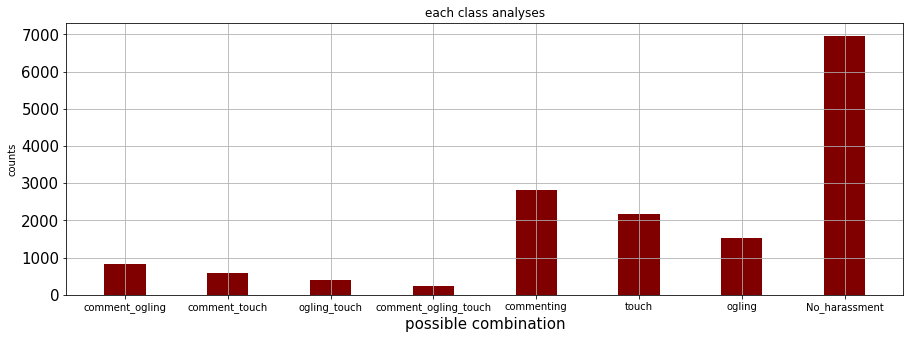

In [14]:
Labels =["comment_ogling", "comment_touch", "ogling_touch", "comment_ogling_touch", "commenting", "touch", "ogling", "No_harassment"]      #creating list of labels and data to plot
classes = [comment_ogling, comment_touch, ogling_touch, comment_ogling_touch,commenting, touch, ogling, No_harassment]
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(Labels, classes, color ='maroon',                    #using matplotlib to plot data
        width = 0.4)
 
plt.xlabel("possible combination", fontsize = 15)
plt.xticks(fontsize=10)
plt.ylabel("counts")
plt.yticks(fontsize=15)
plt.title("each class analyses")
plt.grid()
plt.show()

# First bar “comment_ogling” gives the output of a sentence which indicates commenting and ogling both happened. 843 sentences belong to both classes. 
# Comment_touch = 576 sentences belongs to the commenting and touching class.
# Ogling_touch = 338 sentences belongs to olging and touch class
# Comment_ogling_touch = 243 sentences belongs to all 3 classes 
# Comment = 2820 sentences belongs to commenting class
# Touch = 2166 sentence belongs to Touching /Groping column
# Ogling = 1526 sentence belongs to Ogling/Facial Expressions/Staring
# No _harassment = 6958 sentences which indicates no harassment (0 class )




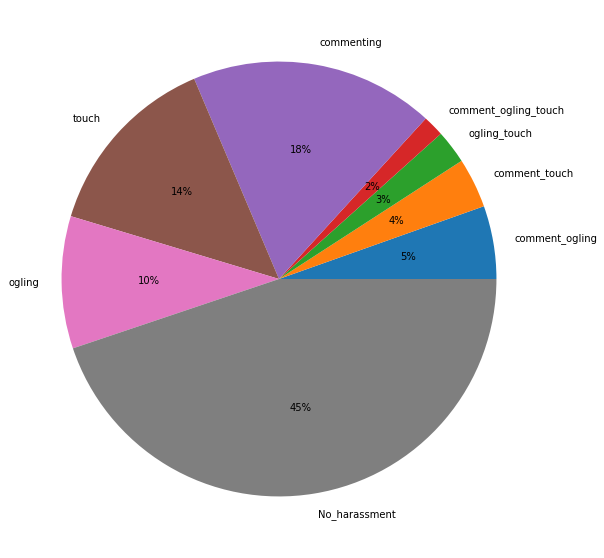

In [15]:
fig = plt.figure(figsize =(15, 10)) #ploting pie chart 
plt.pie(classes, labels=Labels, autopct='%1.0f%%')
  
# This is a pie chart representation of class percentage. 

plt.show()

In [16]:

def wordcloud_func(data):
  ''' writing function to print worldcould'''
  comment_words = ''
  stopwords = set(STOPWORDS)
  
  # iterate through the csv3 file
  for val in data:    #ietrating over text data to get each word
    val = str(val)     # converting each word into str
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()    # coverting all words in lowercase
      
    comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()
  return

AxesSubplot(0.125,0.125;0.775x0.755)


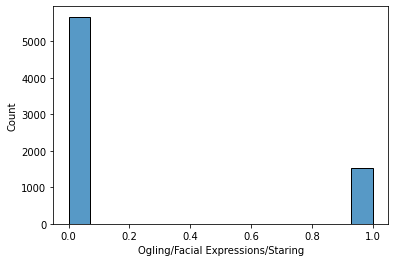

In [17]:
print(sns.histplot(data=data, x= 'Ogling/Facial Expressions/Staring'))
# This bar plot shows the number of positive and negative classes in the commenting column. Only 4000 + sentences that indicate there was no commenting. 



AxesSubplot(0.125,0.125;0.775x0.755)


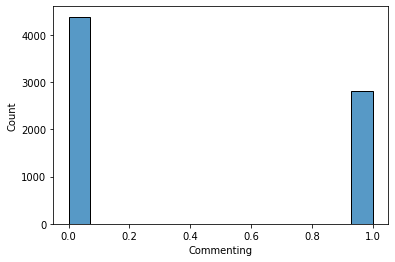

In [18]:
print(sns.histplot(data=data, x= 'Commenting'))
# This shows apx. 5000 sentences out out 7201 are 0 that indicates non touching cases. 

AxesSubplot(0.125,0.125;0.775x0.755)


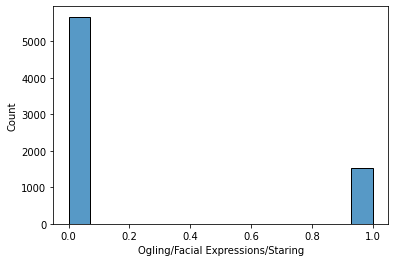

In [19]:
print(sns.histplot(data=data, x='Ogling/Facial Expressions/Staring'))
# This data shows very few % of sentences that tell facial expression was there to harass a person.

## **analyses on text data** 

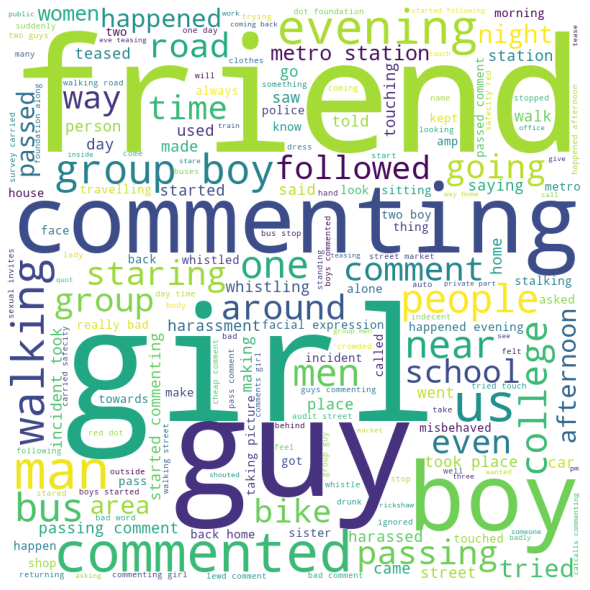

None
****************************************************************************************************


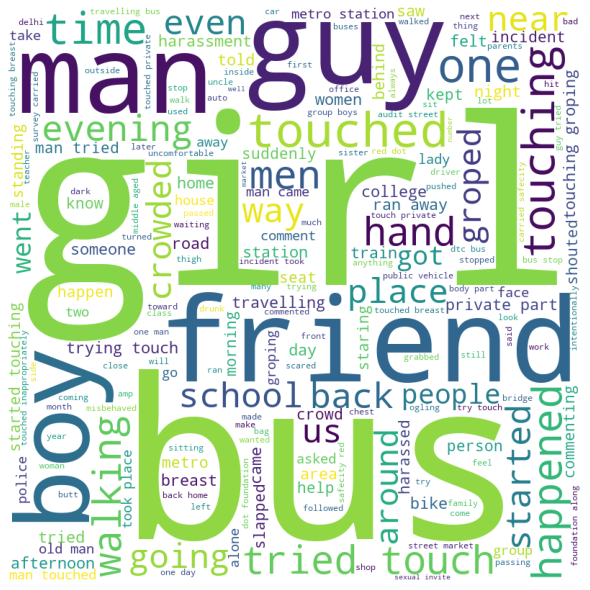

None
****************************************************************************************************


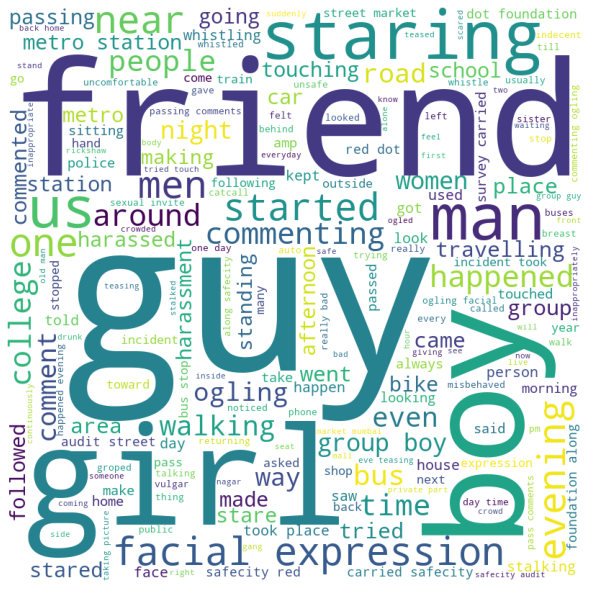

None


In [20]:
# tried to get some information from one type of class
# tried to get if there are some specific words for each class
# hence drawn world cloud for only those sentneces with says harassament heppens
# printed each class
# howerever we do not get any specfic word for particular class 

commenting = (data[data['Commenting']==1])
print(wordcloud_func(data = commenting["Description"]))
print("*"*100)
touch = (data[data['Touching /Groping']==1])
print(wordcloud_func(data = touch["Description"]))
print("*"*100)
ogling = (data[data["Ogling/Facial Expressions/Staring"]==1])
print(wordcloud_func(data = ogling["Description"]))

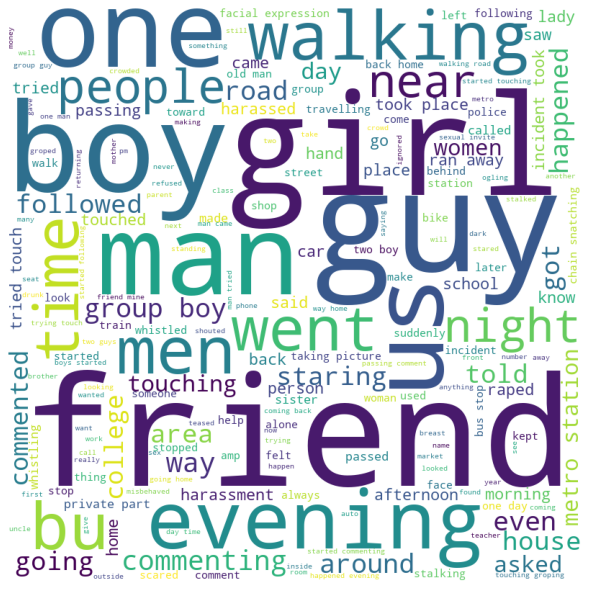

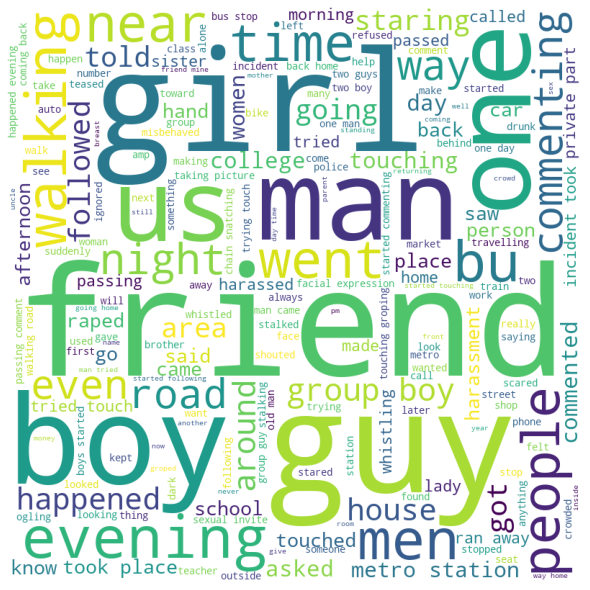

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
# Reads 'Youtube04-Eminem.csv' file 
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in data1:  # Description
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
# afterr removing some words we still get all important words that shows below mentioned world cloud 

In [ ]:
len(filtered_essays[1])

36

In [30]:
approved_word_count = data[data['Commenting']==1]['Description'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = data[data['Commenting']==0]['Description'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


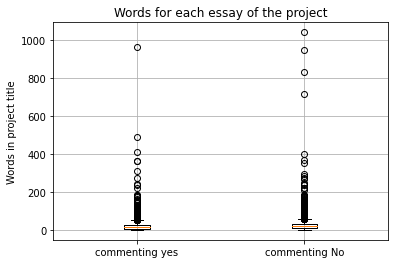

In [ ]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('commenting yes','commenting No'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

In [31]:
 ##calculating sentiment 
#  using sentiment function to match till now analyses
# we get prety good result that matches our all analysis

data['Sentiment'] = data['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(data.head())

                                         Description  ...  Sentiment
0  Was walking along crowded street, holding mums...  ...      0.100
1  This incident took place in the evening.I was ...  ...      0.000
2  I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...  ...      0.100
3                 Incident happened inside the train  ...      0.000
4  I witnessed an incident when a chain was bruta...  ...     -0.875

[5 rows x 5 columns]


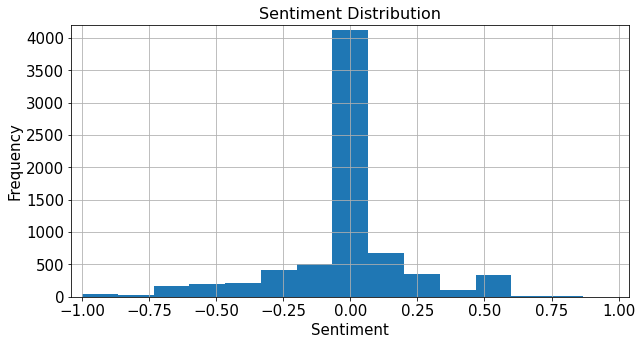

In [32]:
plt.figure(figsize=(10,5))
plt.margins(0.02)  # it take margin from (0,0) axis
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.hist(data['Sentiment'], bins=15)
plt.title('Sentiment Distribution', fontsize=16)
plt.grid()
plt.show()

In [ ]:
# We tried the sentiment of our text data and it gave us very good output.
# It shows most of sentences are neutral and does not belongs to any class. 
# And our actual data also show that only 3% data give class value 1 and 97% data gives value zero to each class( means no harassment). 


**Featurization**

* Length of 'Description 1' - total number of characters in 'Description 1' including spaces
* Word Count in the Complete 'Description -' total number of words in the complete 'Description' text
* Character Count in the Complete 'Description -' total number of characters in complete 'Description' text
* Word Density of the Complete 'Description -' average length of the words used in the 'Description'
* Puncutation Count in the Complete 'Description -' total number of punctuation marks in the 'Description
*' Upper Case Count in the Complete 'Description -' total number of upper count words in the 'Description'.
* Stopword Count in the Complete 'Description'- total number of stopwords in the 'Description'.

In [33]:
data.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,Sentiment
0,"Was walking along crowded street, holding mums...",0,0,1,0.100
1,This incident took place in the evening.I was ...,0,1,0,0.000
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,0.100
3,Incident happened inside the train,0,0,0,0.000
4,I witnessed an incident when a chain was bruta...,0,0,0,-0.875


In [34]:
import string
from nltk.corpus import stopwords
punctuation = string.punctuation
stop_words = list(set(stopwords.words('english')))


data['Char_count']= data['Description'].apply(len)
data["word_count"]= data["Description"].apply(lambda x: len(x.split()))
data['punctuation_count'] = data['Description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
data["upper_case_word_count"]= data["Description"].apply(lambda x: len([i for i in x.split() if i.isupper()]))
data["stop_words_count"]= data["Description"].apply(lambda x: len([j for j in x.split() if j in j.lower() in stop_words]))

In [35]:
data.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,Sentiment,Char_count,word_count,punctuation_count,upper_case_word_count,stop_words_count
0,"Was walking along crowded street, holding mums...",0,0,1,0.100,183,36,6,1,13
1,This incident took place in the evening.I was ...,0,1,0,0.000,89,16,2,0,6
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,0.100,85,18,2,18,0
3,Incident happened inside the train,0,0,0,0.000,34,5,0,0,1
4,I witnessed an incident when a chain was bruta...,0,0,0,-0.875,122,22,2,1,7


* With data feturizatio we got to know that some text are in uppercase hence stopword is nt working in those text
* text contains punctuations
* Hence we have to do some data preprocessing 

In [ ]:
# converting Description column into lowercase

data["Description"]= data["Description"].str.lower()
data["upper_case_word_count"]= data["Description"].apply(lambda x: len([i for i in x.split() if i.isupper()]))

In [ ]:
data

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,upper_case_word_count
0,"was walking along crowded street, holding mums...",0,0,1,0
1,this incident took place in the evening.i was ...,0,1,0,0
2,i was waiting for the bus. a man came on a bik...,1,0,0,0
3,incident happened inside the train,0,0,0,0
4,i witnessed an incident when a chain was bruta...,0,0,0,0
...,...,...,...,...,...
7196,there was this person near a construction site...,0,1,0,0
7197,he threatened me by making inappropriate conve...,1,0,0,0
7198,happened during morning at university metro st...,1,0,0,0
7199,one day my aunt was returniec frm office .. sh...,0,0,0,0


In [ ]:
!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://github.com/swkarlekar/safecity/blob/master/multilabel_classification/test.csv.zip" "https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/test.csv.zip" -c -O 'test.csv.zip'

--2021-07-18 06:31:21--  https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/test.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76000 (74K) [application/zip]
Saving to: ‘test.csv.zip’

test.csv.zip        100%[===================>]  74.22K  --.-KB/s    in 0.002s  

2021-07-18 06:31:21 (33.8 MB/s) - ‘test.csv.zip’ saved [76000/76000]



In [ ]:
!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://github.com/swkarlekar/safecity/blob/master/multilabel_classification/dev.csv.zip" "https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/dev.csv.zip" -c -O 'dev.csv.zip'

--2021-07-18 06:31:23--  https://raw.githubusercontent.com/swkarlekar/safecity/master/multilabel_classification/dev.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42930 (42K) [application/zip]
Saving to: ‘dev.csv.zip’

dev.csv.zip         100%[===================>]  41.92K  --.-KB/s    in 0.001s  

2021-07-18 06:31:23 (71.7 MB/s) - ‘dev.csv.zip’ saved [42930/42930]



In [ ]:
!unzip test.csv.zip
!unzip dev.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  dev.csv.zip
  inflating: dev.csv                 


In [ ]:
test_data = pd.read_csv('test.csv')
cv_data = pd.read_csv("dev.csv")
X_train = data["Description"].values
X_test = test_data["Description"].values
X_cv = cv_data["Description"].values
train_y= data.drop("Description", axis=1)
test_y = test_data.drop("Description", axis =1)
cv_y = cv_data.drop("Description", axis = 1)
print(train_y.head(),"\n", test_y.head(), '\n',cv_y.head())

   Commenting  Ogling/Facial Expressions/Staring  Touching /Groping
0           0                                  0                  1
1           0                                  1                  0
2           1                                  0                  0
3           0                                  0                  0
4           0                                  0                  0 
    Commenting  Ogling/Facial Expressions/Staring  Touching /Groping
0           1                                  1                  0
1           0                                  0                  1
2           0                                  1                  0
3           0                                  1                  0
4           0                                  0                  1 
    Commenting  Ogling/Facial Expressions/Staring  Touching /Groping
0           1                                  0                  1
1           1                               

In [ ]:
len(test_y)

1701

#*data preprocessing*

I want to use text_to_word_sequence from keras, however, it takes text type and we have series of str data. Hence we conveted it to string first

In [ ]:
import re


def preprocess(Input_Text):

    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    preprocessed_text = []
    for sentence in Input_Text:
      sentence = sentence.lower()
      sentence = re.sub('<[^>]+>', '', sentence)    #removing words under tags
      sentence = re.sub(r"\([^()]*\)", "", sentence)  #removing words under parentheses 
      sentence = re.sub('[^A-Za-z0-9]+', " ", sentence)  # removing all special char and spaces ect.
      sentence = re.sub(r'\w+:\s?',"", sentence)   # removing word ending with ':'

      #decontractions
      sentence = re.sub(r"n\'t", " not", sentence)
      sentence = re.sub(r"\'re", " are", sentence)
      sentence = re.sub(r"\'s", " is", sentence)
      sentence = re.sub(r"\'d", " would", sentence)
      sentence = re.sub(r"\'ll", " will", sentence)
      sentence = re.sub(r"\'t", " not", sentence)
      sentence = re.sub(r"\'ve", " have", sentence)
      sentence = re.sub(r"\'m", " am", sentence)
      short_word =re.compile(r'\W*\b\w{1,2}\b')  # removing short word=2
      sentence = short_word.sub('', sentence) 
      preprocessed_text.append(sentence)
    return( preprocessed_text)

In [ ]:
preprocessed_text = preprocess(X_train)


In [ ]:

preprocessed_text[:5]

['was walking along crowded street holding mums hand when elderly man groped butt turned look h7m and looked away and did again after while was yrs old then ',
 'this incident took place the evening was the metro when two guys started staring ',
 ' was waiting for the bus man came bike and was offering liftvto young girls ',
 'incident happened inside the train',
 ' witnessed incident when chain was brutally snatched from elderly lady the incident took place during evening ']

In [ ]:
preprocessed_text_test = preprocess(X_test) 
preprocessed_text_CV = preprocess(X_cv)

#**Word2vec**

In [ ]:
def get_words(data):
  '''we have to split sentence with space because word2vec takes word instea of sentence'''
  vec = []
  for i in data:
    vec.append(i.split())
  return vec

In [ ]:
vec = get_words(data= preprocessed_text)
vec_test = get_words(preprocessed_text_test)

[['was', 'walking', 'along', 'crowded', 'street', 'holding', 'mums', 'hand', 'when', 'elderly', 'man', 'groped', 'butt', 'turned', 'look', 'h7m', 'and', 'looked', 'away', 'and', 'did', 'again', 'after', 'while', 'was', 'yrs', 'old', 'then'], ['this', 'incident', 'took', 'place', 'the', 'evening', 'was', 'the', 'metro', 'when', 'two', 'guys', 'started', 'staring'], ['was', 'waiting', 'for', 'the', 'bus', 'man', 'came', 'bike', 'and', 'was', 'offering', 'liftvto', 'young', 'girls'], ['incident', 'happened', 'inside', 'the', 'train'], ['witnessed', 'incident', 'when', 'chain', 'was', 'brutally', 'snatched', 'from', 'elderly', 'lady', 'the', 'incident', 'took', 'place', 'during', 'evening']]
[['was', 'walking', 'along', 'crowded', 'street', 'holding', 'mums', 'hand', 'when', 'elderly', 'man', 'groped', 'butt', 'turned', 'look', 'h7m', 'and', 'looked', 'away', 'and', 'did', 'again', 'after', 'while', 'was', 'yrs', 'old', 'then'], ['this', 'incident', 'took', 'place', 'the', 'evening', 'was'

In [ ]:
# vec = []
# for i in preprocessed_text:
#   vec.append(i.split())    ## i.split()  ===> spliting the sentence based on space.

In [ ]:
# #vec_test = []
# for i in preprocessed_text_test:
#   vec_test.append(i.split())    ## i.split()  ===> spliting the sentence based on space.

In [ ]:
# #vec_cv = []
# for i in preprocessed_text_CV:
#   vec_cv.append(i.split())    ## i.split()  ===> spliting the sentence based on space.


In [ ]:
from gensim.models import word2vec, Word2Vec
import numpy as np

num_features = 50        ### finally each word should be 50 dimensional vector.
min_word_count = 3    
num_workers = 4       
context = 8           
downsampling = 1e-3   

# Initialize and train the model
W2Vmodel = Word2Vec(sentences=vec, sg=1, hs=0, workers=num_workers, size=num_features, min_count=min_word_count, window=context,
                    sample=downsampling, negative=5, iter=6)

In [ ]:
def sentence_vector(model, sentence):
  model = W2Vmodel
  model_voc = set(model.wv.vocab.keys()) 
  sent_vector = np.zeros(model.vector_size, dtype="float32")
  nwords = 0
  for word in vec[0]:
    if word in model_voc: 
        sent_vector += model[word]
        nwords += 1

  # Now get the average
  if nwords > 0:
    sent_vector /= nwords
  
  return sent_vector

w2v_encoded_vectors = []
for sen in vec:
  encoded_vector = sentence_vector(W2Vmodel, vec)
  w2v_encoded_vectors.append(encoded_vector)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
print("len of vector:", len(w2v_encoded_vectors), "dimension of vector:", len(w2v_encoded_vectors[0]))

len of vector: 7201 dimension of vector: 50


In [ ]:
# test data embedding

w2v_encoded_vectors_test = []
for sen in vec_test:
  encoded_vector = sentence_vector(W2Vmodel, vec_test)
  w2v_encoded_vectors_test.append(encoded_vector)
len(w2v_encoded_vectors_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


1701

In [ ]:
# CV data embedding

w2v_encoded_vectors_cv = []
for sen in vec_cv:
  encoded_vector = sentence_vector(W2Vmodel, vec)
  w2v_encoded_vectors_cv.append(encoded_vector)
# w2v_encoded_vectors_cv[:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


#**TF-IDF**

In [ ]:
tf_vectorize= TfidfVectorizer()
train_tfidf=tf_vectorize.fit(preprocessed_text)
train_tfidf = tf_vectorize.transform(preprocessed_text)
test_tfidf= tf_vectorize.transform(preprocessed_text_test)
cv_tfidf = tf_vectorize.transform(preprocessed_text_CV)


#*BERT*

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 2.8MB/s 


In [ ]:
from google.colab import files
# import tokenization
files = files.upload()  #upload tokenization.py file

Saving tokenization.py to tokenization.py


In [ ]:
import tqdm
import tokenization
import tokenize
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Model


In [ ]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [ ]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
def bert_tokenization(text):
  tokens = tokenizer.tokenize(text)
  max_seq_length=55
  if len(tokens)>max_seq_length-2:
    tokens=tokens[0:max_seq_length-2]
  tokens = ['[CLS]',*tokens,'[SEP]']
  tokens = tokenizer.convert_tokens_to_ids(tokens)
  mask = np.array([1]*len(tokens)+[0]*(max_seq_length-len(tokens)))
  segment = np.array([0]*max_seq_length)
  tokens = np.array(tokens+[0]*(max_seq_length-len(tokens)))

  return tokens, mask, segment

In [ ]:
tokenizer=tokenization.FullTokenizer(vocab_file, do_lower_case )

In [ ]:

X_train_tokens = np.zeros((X_train.shape[0],55))
X_train_mask = np.zeros((X_train.shape[0],55))
X_train_segment = np.zeros((X_train.shape[0],55))
print(X_train_mask.shape, X_train_segment.shape)

(7201, 55) (7201, 55)


In [ ]:
# X_test = test_data
X_test_tokens = np.zeros((X_test.shape[0],55))
X_test_mask = np.zeros((X_test.shape[0],55))
X_test_segment = np.zeros((X_test.shape[0],55))
print(X_test_mask.shape, X_test_segment.shape)

(1701, 55) (1701, 55)


In [ ]:
# X_cv = test_data
X_cv_tokens = np.zeros((X_cv.shape[0],55))
X_cv_mask = np.zeros((X_cv.shape[0],55))
X_cv_segment = np.zeros((X_cv.shape[0],55))
print(X_cv_mask.shape, X_cv_segment.shape)

(990, 55) (990, 55)


In [ ]:
for i in (range(X_train.shape[0])):
  X_train_tokens[i], X_train_mask[i], X_train_segment[i] = bert_tokenization(preprocessed_text[i])
 

In [ ]:
for i in (range(X_test.shape[0])):
  X_test_tokens[i], X_test_mask[i], X_test_segment[i] = bert_tokenization(preprocessed_text_test[i])

In [ ]:
for i in (range(X_cv.shape[0])):
  X_cv_tokens[i], X_cv_mask[i], X_test_segment[i] = bert_tokenization(X_cv[i])

In [ ]:
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [ ]:
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [ ]:
X_cv_pooled_output=bert_model.predict([X_cv_tokens,X_cv_mask,X_cv_segment])

In [ ]:
X_cv_pooled_output

#**Machine learning model**

#**cross validation with desision Tree classifier**

In [ ]:
# cross validation with TF-IDF embedded data
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



parameters = {'criterion': ['gini', 'entropy'],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(train_tfidf, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7695464473895391 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 100}


In [ ]:
# cross validation with bert embedded data
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



parameters = {'criterion': ['gini', 'entropy'],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(X_train_pooled_output, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.6099181707256285 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [ ]:
# cross validation with Word2vec embedded data

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



parameters = {'criterion': ['gini', 'entropy'],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(w2v_encoded_vectors, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}


#**training model with DescisionTree-Classification**



In [ ]:
# using Word2vec for desicion tree model
classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth= 1, min_samples_split= 5), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(w2v_encoded_vectors, train_y)
predictions = classifier.predict(w2v_encoded_vectors_test)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.31746031746031744
macro f1 score : 0.0
micro f1 scoore : 0.0
hamming loss : 0.3045267489711934
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       654
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       525

   micro avg       0.00      0.00      0.00      1554
   macro avg       0.00      0.00      0.00      1554
weighted avg       0.00      0.00      0.00      1554
 samples avg       0.00      0.00      0.00      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# using df-idf value for decision tree

classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion= 'entropy', max_depth= 50, min_samples_split= 100), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.5908289241622575
macro f1 score : 0.629633491740875
micro f1 scoore : 0.6607994132746609
hamming loss : 0.18126592200666275
Precision recall report :
               precision    recall  f1-score   support

           0       0.76      0.66      0.70       654
           1       0.63      0.35      0.45       375
           2       0.85      0.65      0.74       525

   micro avg       0.77      0.58      0.66      1554
   macro avg       0.75      0.55      0.63      1554
weighted avg       0.76      0.58      0.65      1554
 samples avg       0.45      0.42      0.42      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# using BERT value for decision tree

classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_split= 5), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(X_train_pooled_output, train_y)
predictions = classifier.predict(X_test_pooled_output)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.36860670194003525
macro f1 score : 0.3076759454661173
micro f1 scoore : 0.3805970149253732
hamming loss : 0.2927689594356261
Precision recall report :
               precision    recall  f1-score   support

           0       0.56      0.50      0.53       654
           1       0.38      0.05      0.09       375
           2       0.52      0.22      0.30       525

   micro avg       0.53      0.30      0.38      1554
   macro avg       0.48      0.26      0.31      1554
weighted avg       0.50      0.30      0.35      1554
 samples avg       0.25      0.22      0.22      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**SGD with Linear regression**

In [ ]:
# Word2vec

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(w2v_encoded_vectors, train_y)
predictions = classifier.predict(w2v_encoded_vectors_test)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.21693121693121692
macro f1 score : 0.1851380042462845
micro f1 scoore : 0.40184331797235023
hamming loss : 0.38154027042915933
Precision recall report :
               precision    recall  f1-score   support

           0       0.38      1.00      0.56       654
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       525

   micro avg       0.38      0.42      0.40      1554
   macro avg       0.13      0.33      0.19      1554
weighted avg       0.16      0.42      0.23      1554
 samples avg       0.38      0.29      0.32      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# tf_idf with SGD- linear

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.5620223398001176
macro f1 score : 0.6324697566824254
micro f1 scoore : 0.6568213783403656
hamming loss : 0.19126004311189496
Precision recall report :
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       654
           1       0.57      0.40      0.47       375
           2       0.81      0.66      0.73       525

   micro avg       0.72      0.60      0.66      1554
   macro avg       0.70      0.58      0.63      1554
weighted avg       0.72      0.60      0.65      1554
 samples avg       0.46      0.44      0.43      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# BERT with SGD- linear

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)  #SGDclassifier for logistic regression
classifier.fit(X_train_pooled_output, train_y)
predictions = classifier.predict(X_test_pooled_output)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.42386831275720166
macro f1 score : 0.4752154576972096
micro f1 scoore : 0.5475792988313857
hamming loss : 0.26553008034489517
Precision recall report :
               precision    recall  f1-score   support

           0       0.70      0.56      0.62       654
           1       0.59      0.13      0.21       375
           2       0.49      0.78      0.60       525

   micro avg       0.57      0.53      0.55      1554
   macro avg       0.59      0.49      0.48      1554
weighted avg       0.60      0.53      0.51      1554
 samples avg       0.41      0.39      0.38      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**SVM**

In [ ]:
train_y.shape

(7201, 3)

In [ ]:
# word2vec with SVC 

from sklearn.svm import SVC

classifier = OneVsRestClassifier(SVC(kernel="linear"), n_jobs=-1)  
classifier.fit(w2v_encoded_vectors, train_y)
predictions = classifier.predict(w2v_encoded_vectors_test)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


In [ ]:
# TF-IDF with SVC 

from sklearn.svm import SVC

classifier = OneVsRestClassifier(SVC(), n_jobs=-1)  
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.6225749559082893
macro f1 score : 0.6170116958933027
micro f1 scoore : 0.6627078384798101
hamming loss : 0.16696061140505586
Precision recall report :
               precision    recall  f1-score   support

           0       0.85      0.64      0.73       654
           1       0.78      0.26      0.39       375
           2       0.90      0.61      0.73       525

   micro avg       0.86      0.54      0.66      1554
   macro avg       0.84      0.50      0.62      1554
weighted avg       0.85      0.54      0.65      1554
 samples avg       0.44      0.40      0.41      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# BERT with SVC 

classifier = OneVsRestClassifier(SVC(), n_jobs=-1)
classifier.fit(X_train_pooled_output, train_y)
predictions = classifier.predict(X_test_pooled_output)

print("accuracy :",metrics.accuracy_score(test_y,predictions))
print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.4044679600235156
macro f1 score : 0.21003996090856292
micro f1 scoore : 0.32153690596562184
hamming loss : 0.26298255927885555
Precision recall report :
               precision    recall  f1-score   support

           0       0.74      0.46      0.57       654
           1       0.00      0.00      0.00       375
           2       1.00      0.03      0.06       525

   micro avg       0.75      0.20      0.32      1554
   macro avg       0.58      0.16      0.21      1554
weighted avg       0.65      0.20      0.26      1554
 samples avg       0.19      0.15      0.16      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**cross validation with Randomforest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# cross validation with W2V embedded with randomforest


parameters = {'n_estimators': [10,20,40,50,80,100],
              'criterion': ["gini", "entropy"],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(RandomForestClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(w2v_encoded_vectors, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5 {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 10}


In [ ]:
# cross validation with TF-IDF embedded data
from sklearn.model_selection import GridSearchCV




parameters = {'n_estimators': [10,20,40,50,80,100],
              'criterion': ["gini", "entropy"],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(RandomForestClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(train_tfidf, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8166331791461345 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# cross validation with BERT embedded with rndomeforset 

parameters = {'n_estimators': [10,40,80,100],
              'criterion': ["gini", "entropy"],
                       'max_depth': [1,5,10,25,50],
                       'min_samples_split' : [5,10,100,1000]}
clf = GridSearchCV(RandomForestClassifier(class_weight= 'balanced'),parameters,n_jobs =4,scoring="roc_auc",return_train_score=True)
clf.fit(X_train_pooled_output, train_y)
# clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7008842932109152 {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 100}


#**train data with randomforest model with best hyper-parameter values**





In [ ]:
# word2vec with randomforest 

from sklearn.svm import SVC

classifier = OneVsRestClassifier(RandomForestClassifier(criterion= 'gini', max_depth= 1, min_samples_split= 5, n_estimators= 10), n_jobs=-1)  
classifier.fit(w2v_encoded_vectors, train_y)
predictions = classifier.predict(w2v_encoded_vectors_test)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.31746031746031744
macro f1 score : 0.0
micro f1 scoore : 0.0
hamming loss : 0.3045267489711934
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       654
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       525

   micro avg       0.00      0.00      0.00      1554
   macro avg       0.00      0.00      0.00      1554
weighted avg       0.00      0.00      0.00      1554
 samples avg       0.00      0.00      0.00      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# IF_IDF with randomforest 

from sklearn.svm import SVC

classifier = OneVsRestClassifier(RandomForestClassifier(criterion= 'entropy', max_depth= 50, min_samples_split= 10, n_estimators= 100), n_jobs=-1)  
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


macro f1 score : 0.5231422198947105
micro f1 scoore : 0.5896003437902879
hamming loss : 0.18714481677444642
Precision recall report :
               precision    recall  f1-score   support

           0       0.87      0.55      0.68       654
           1       0.89      0.13      0.23       375
           2       0.91      0.52      0.66       525

   micro avg       0.89      0.44      0.59      1554
   macro avg       0.89      0.40      0.52      1554
weighted avg       0.89      0.44      0.56      1554
 samples avg       0.37      0.33      0.34      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# BERT with randomforest 

from sklearn.svm import SVC

classifier = OneVsRestClassifier(RandomForestClassifier(criterion= 'entropy', max_depth= 5, min_samples_split= 10, n_estimators= 100), n_jobs=-1)  
classifier.fit(X_train_pooled_output, train_y)
predictions = classifier.predict(X_test_pooled_output)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


macro f1 score : 0.1422638088212975
micro f1 scoore : 0.1851851851851852
hamming loss : 0.284538506760729
Precision recall report :
               precision    recall  f1-score   support

           0       0.72      0.22      0.34       654
           1       0.78      0.02      0.04       375
           2       0.75      0.03      0.06       525

   micro avg       0.72      0.11      0.19      1554
   macro avg       0.75      0.09      0.14      1554
weighted avg       0.74      0.11      0.17      1554
 samples avg       0.09      0.08      0.08      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Train Data with XGBClassifier**

In [ ]:
from sklearn.ensemble import  *
from xgboost import XGBClassifier


#  GradientBoostingClassifier with tf-idf  

classifier = OneVsRestClassifier(XGBClassifier(), n_jobs=-1)  
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


accuracy : 0.6055261610817166
macro f1 score : 0.605107409246534
micro f1 scoore : 0.6398357289527721
hamming loss : 0.1718596903782089
Precision recall report :
               precision    recall  f1-score   support

           0       0.89      0.57      0.69       654
           1       0.80      0.28      0.42       375
           2       0.91      0.57      0.70       525

   micro avg       0.88      0.50      0.64      1554
   macro avg       0.87      0.47      0.61      1554
weighted avg       0.88      0.50      0.63      1554
 samples avg       0.41      0.37      0.38      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Training data with AdaBoostClassifier**

In [ ]:
# AdaBoostClassifier with W2v

classifier = OneVsRestClassifier(AdaBoostClassifier(), n_jobs=-1)  
classifier.fit(w2v_encoded_vectors, train_y)
predictions = classifier.predict(w2v_encoded_vectors_test)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))

macro f1 score : 0.0
micro f1 scoore : 0.0
hamming loss : 0.3045267489711934
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       654
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       525

   micro avg       0.00      0.00      0.00      1554
   macro avg       0.00      0.00      0.00      1554
weighted avg       0.00      0.00      0.00      1554
 samples avg       0.00      0.00      0.00      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#AdaBoostClassifier model with Tf-IDF

classifier = OneVsRestClassifier(AdaBoostClassifier(), n_jobs=-1)  
classifier.fit(train_tfidf, train_y)
predictions = classifier.predict(test_tfidf)

print("macro f1 score :",metrics.f1_score(test_y, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(test_y, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(test_y,predictions))
print("Precision recall report :\n",metrics.classification_report(test_y, predictions))


macro f1 score : 0.6232724908860341
micro f1 scoore : 0.6605080831408776
hamming loss : 0.1728395061728395
Precision recall report :
               precision    recall  f1-score   support

           0       0.83      0.63      0.72       654
           1       0.71      0.30      0.43       375
           2       0.87      0.63      0.73       525

   micro avg       0.82      0.55      0.66      1554
   macro avg       0.80      0.52      0.62      1554
weighted avg       0.81      0.55      0.65      1554
 samples avg       0.44      0.41      0.41      1554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Deep learning model**

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
# reshaping data to work on LSTM layers
print(type(X_train_pooled_output))
print(type(X_test_pooled_output))
input_bert_train = X_train_pooled_output.reshape(X_train_pooled_output.shape[0], X_train_pooled_output.shape[1], 1)
input_bert_test = X_test_pooled_output.reshape(X_test_pooled_output.shape[0], X_test_pooled_output.shape[1], 1)
print(input_bert_train.shape, input_bert_test.shape)





<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7201, 768, 1) (1701, 768, 1)


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import Input, Model, layers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers, optimizers
from keras import Input
from keras import Model
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
class Metrics(Callback):
  def on_train_begin(self, logs={}):
    self.val_f1s = []
    self.val_recalls = []
    self.val_precisions = []
 
  def on_epoch_end(self, epoch, logs={}):
    val_predict = (np.asarray(model.predict(validation_data[0])))
    val_predict = np.round(val_predict)
    val_targ = validation_data[1]
    _val_f1 = f1_score(val_targ, val_predict, average="micro")
    _val_recall = recall_score(val_targ, val_predict, average="micro")
    _val_precision = precision_score(val_targ, val_predict, average="micro")
    self.val_f1s.append(_val_f1)
    self.val_recalls.append(_val_recall)
    self.val_precisions.append(_val_precision)
    print ("— val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
    return
 
metrics = Metrics()

In [ ]:
input= Input(shape=(768,1), dtype= 'float32')
LSTM_layer1 = layers.LSTM(units= 30, activation='sigmoid')(input)
flatten1 = layers.Flatten()(LSTM_layer1)
dense= layers.Dense(225, activation='sigmoid')(flatten1)
dense1 = layers.Dense(150,activation='sigmoid')(dense)
dense2 = layers.Dense(10,activation='sigmoid')(dense1)
output_layer = layers.Dense(3,activation="softmax")(dense2)
model = Model(input, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 768, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 30)                3840      
_________________________________________________________________
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 225)               6975      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               33900     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33  

In [ ]:
from keras.callbacks import *
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
validation_data=(input_bert_test,test_y)
model.fit(input_bert_train,train_y,epochs=100,validation_data=(input_bert_test,test_y),batch_size=100, callbacks= [earlystop, metrics] )


Epoch 1/100
73/73 [==============================] - 24s 305ms/step - loss: 0.9606 - accuracy: 0.7048 - val_loss: 0.9845 - val_accuracy: 0.7019


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/100
73/73 [==============================] - 21s 293ms/step - loss: 0.9734 - accuracy: 0.7069 - val_loss: 0.9831 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/100
73/73 [==============================] - 22s 297ms/step - loss: 0.9620 - accuracy: 0.7050 - val_loss: 0.9821 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/100
73/73 [==============================] - 21s 293ms/step - loss: 0.9664 - accuracy: 0.7092 - val_loss: 0.9817 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/100
73/73 [==============================] - 22s 300ms/step - loss: 0.9721 - accuracy: 0.6966 - val_loss: 0.9838 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/100
73/73 [==============================] - 22s 296ms/step - loss: 0.9628 - accu

In [ ]:
# conv_layer1 = layers.Conv1D(5, 2, strides=2, activation='relu')(input2)
# conv_layer2 = layers.Conv1D(4, 2, strides=1, activation='relu')(conv_layer1)
# flatten_layer = layers.Flatten()(conv_layer2)

input= Input(shape=(768,1), dtype= 'float32')
conv_layer1 = layers.Conv1D(5, 2, strides=2, activation='relu')(input)
conv_layer2 = layers.Conv1D(4, 2, strides=1, activation='relu')(conv_layer1)
flatten_layer = layers.Flatten()(conv_layer2)
# flatten1 = layers.Flatten()(LSTM_layer1)
dense= layers.Dense(225, activation='relu')(flatten_layer)
dense1 = layers.Dense(150,activation='relu')(dense)
dense2 = layers.Dense(10,activation='relu')(dense1)
output_layer = layers.Dense(3,activation="softmax")(dense2)
model2 = Model(input, output_layer)
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 768, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 384, 5)            15        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 383, 4)            44        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1532)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 225)               344925    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               33900     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510

In [ ]:

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(input_bert_train,train_y,epochs=100,validation_data=(input_bert_test,test_y),batch_size=100, callbacks= [earlystop, metrics] )

Epoch 1/100
73/73 [==============================] - 4s 27ms/step - loss: 0.9710 - accuracy: 0.5527 - val_loss: 1.1165 - val_accuracy: 0.0999
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/100
 7/73 [=>............................] - ETA: 1s - loss: 1.2125 - accuracy: 0.1290

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


73/73 [==============================] - 2s 22ms/step - loss: 1.1454 - accuracy: 0.3738 - val_loss: 7.1879 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/100
73/73 [==============================] - 2s 23ms/step - loss: 6.7810 - accuracy: 0.4245 - val_loss: 28.0766 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/100
73/73 [==============================] - 2s 22ms/step - loss: 31.1651 - accuracy: 0.4033 - val_loss: 195.7339 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/100
73/73 [==============================] - 2s 22ms/step - loss: 138.2708 - accuracy: 0.4201 - val_loss: 125.0562 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/100
73/73 [==============================] - 2s 23ms/step - loss: 207.7405 - accuracy: 0.3847 - val_loss: 271.1181 - val_accuracy: 0.7019
Restoring model weight

In [ ]:
token = Tokenizer()  #removing special charactor 
train_essay= token.fit_on_texts(preprocessed_text)
unique_words = len(token.word_index)+1   #unique words

print((unique_words))
data_encoding = token.texts_to_sequences(preprocessed_text)
data_encoding_testX= token.texts_to_sequences(preprocessed_text_test)
data_encoding_cv= token.texts_to_sequences(preprocessed_text_CV)
max_len= 300 #5000
data_padded = tf.keras.preprocessing.sequence.pad_sequences(data_encoding, max_len, padding= 'post')
data_padded_testX= tf.keras.preprocessing.sequence.pad_sequences(data_encoding_testX, max_len, padding= 'post')
data_padded_cv = tf.keras.preprocessing.sequence.pad_sequences(data_encoding_cv, max_len, padding= 'post')

# need input shape in 3 dimenstion as we are using LSTM layers

data_padded = data_padded.reshape(data_padded.shape[0], data_padded.shape[1], 1)
data_padded_testX = data_padded_testX.reshape(data_padded_testX.shape[0], data_padded_testX.shape[1], 1)
data_padded_cv = data_padded_cv.reshape(data_padded_cv.shape[0], data_padded_cv.shape[1], 1)

print(data_padded.shape)
print(data_padded_testX.shape)
print(data_padded_cv.shape)

8361
(7201, 300, 1)
(1701, 300, 1)
(990, 300, 1)


In [ ]:
data_padded.shape[1:3]

(300, 1)

In [ ]:
# model3

input = tf.keras.layers.Input(shape= (300,1))
# emb1 = tf.keras.layers.Embedding(8361, 100, input_length= 300, trainable=False)(input)
conv1 = tf.keras.layers.Conv1D(25, 3,activation='sigmoid', padding='valid')(input)
conv2 = tf.keras.layers.Conv1D(30, 5, activation='sigmoid',padding='same')(conv1) 
max_pool = tf.keras.layers.MaxPool1D(2)(conv2)
lstm = tf.keras.layers.LSTM(units= 30, activation='sigmoid')(max_pool)
dense = tf.keras.layers.Dense(100, activation='sigmoid')(lstm)
output_layer=tf.keras.layers.Dense(3, activation="sigmoid")(dense)
model3 = Model(input, output_layer)
model3.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 14,603
Trainable params: 14,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cv_y.shape

(990, 3)

In [ ]:
# trainins same model with padding data

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model3.compile(optimizer='adagrad',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(data_padded,train_y,epochs=100,validation_data=(data_padded_testX,test_y),batch_size=100, callbacks= [earlystop,metrics] )


Epoch 1/100
73/73 [==============================] - 10s 122ms/step - loss: 1.0407 - accuracy: 0.6992 - val_loss: 0.9959 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/100
 1/73 [..............................] - ETA: 8s - loss: 1.0892 - accuracy: 0.7000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


73/73 [==============================] - 9s 117ms/step - loss: 0.9706 - accuracy: 0.7038 - val_loss: 0.9845 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/100
73/73 [==============================] - 8s 116ms/step - loss: 0.9827 - accuracy: 0.7001 - val_loss: 0.9822 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/100
73/73 [==============================] - 9s 117ms/step - loss: 0.9717 - accuracy: 0.7024 - val_loss: 0.9818 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/100
73/73 [==============================] - 8s 116ms/step - loss: 0.9744 - accuracy: 0.7054 - val_loss: 0.9814 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/100
73/73 [==============================] - 9s 118ms/step - loss: 0.9572 - accuracy: 0.7061 - val_loss: 0.9813 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_prec

In [ ]:
# training same model3 with BERT embedding


earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(input_bert_train,train_y,epochs=50,validation_data=(input_bert_test,test_y),batch_size=100, callbacks= [earlystop,metrics] )


Epoch 1/50
73/73 [==============================] - 68s 923ms/step - loss: 1.0101 - accuracy: 0.7152 - val_loss: 0.9825 - val_accuracy: 0.7019


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/50
73/73 [==============================] - 21s 293ms/step - loss: 0.9578 - accuracy: 0.7054 - val_loss: 0.9815 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/50
73/73 [==============================] - 21s 294ms/step - loss: 0.9801 - accuracy: 0.5268 - val_loss: 0.9831 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/50
73/73 [==============================] - 21s 295ms/step - loss: 0.9779 - accuracy: 0.5344 - val_loss: 0.9840 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/50
73/73 [==============================] - 21s 293ms/step - loss: 0.9648 - accuracy: 0.7149 - val_loss: 0.9840 - val_accuracy: 0.7019
— val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/50
73/73 [==============================] - 21s 294ms/step - loss: 0.9891 - accuracy:

In [ ]:
model3.predict(data_padded_testX)

array([[0.47910428, 0.33907962, 0.42337787],
       [0.47910428, 0.33907962, 0.42337787],
       [0.47910428, 0.33907962, 0.42337787],
       ...,
       [0.47910428, 0.33907962, 0.42337787],
       [0.47910428, 0.33907962, 0.42337787],
       [0.47910425, 0.33907962, 0.42337787]], dtype=float32)

In [ ]:
input_bert_test.shape

(1701, 768, 1)

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Models", " Desicion-tree", "SGD linear regression", "SGD SVC", "RandomForest","XGBclassifier", "Adaboost"])
  
# Add rows
myTable.add_row(["Hamming-loss/W2v ", 0.30, 0.38, 0.30, 0.30, "NA", 0.30])
myTable.add_row(["hamming-loss/tf-idf", 0.18, 0.19, 0.16, 0.18, 0.17, 0.17])
myTable.add_row(["hamming-loss/BERT", 0.26, 0.26, 0.26, 0.28, "NA", "NA"])
myTable.add_row(["macro_F1/W2vT", 0.0, 0.18, 00, 00,"NA",0.0])
myTable.add_row(["macro_F1/Tf_IDF", 0.62, 0.63, 0.61, 0.53, 0.60, 0.66])
myTable.add_row(["macro_F1/BERT", 0.38, 0.47, 0.21, 0.14,"NA","NA" ])
myTable.add_row(["micro_F1/W2v", 0.0, 0.40, 0.0, 0.0,"Na", 0.0])
myTable.add_row(["micro_F1/TF-IDF", 0.66,0.65, 0.66, 0.58,0.63,0.66])
myTable.add_row(["micro_F1/BERT", 0.38, 0.54, 0.32, 0.18,"NA","NA"])
  
print(myTable)

+---------------------+----------------+-----------------------+---------+--------------+---------------+----------+
|        Models       |  Desicion-tree | SGD linear regression | SGD SVC | RandomForest | XGBclassifier | Adaboost |
+---------------------+----------------+-----------------------+---------+--------------+---------------+----------+
|  Hamming-loss/W2v   |      0.3       |          0.38         |   0.3   |     0.3      |       NA      |   0.3    |
| hamming-loss/tf-idf |      0.18      |          0.19         |   0.16  |     0.18     |      0.17     |   0.17   |
|  hamming-loss/BERT  |      0.26      |          0.26         |   0.26  |     0.28     |       NA      |    NA    |
|    macro_F1/W2vT    |      0.0       |          0.18         |    0    |      0       |       NA      |   0.0    |
|   macro_F1/Tf_IDF   |      0.62      |          0.63         |   0.61  |     0.53     |      0.6      |   0.66   |
|    macro_F1/BERT    |      0.38      |          0.47         |

#**Observation**

*  I have tried multiple three models of Machine learning with three ways for embedding.
*  embedding = Tf-idf, W2V with gensim.models, BERT
*  ML models - Desicion-Tree, Linear regression, SVM
*  BERT score we get with TF_IDF with SVM 
*  I have used matric as hamming loss, F1 macro, F1 micro score.
*  This data was multi-label classification with higly imbalanced data.
*  Micro-F1 score handles imblanced data very well.
*  **I get hightest F1-score with tf-IDF with SGD SVM**.
* Also, tried LSTM model with BERT embedding and got 70% test accuracy
* tried some more models in ML RandomForest, XGClassifier, Adaboost
* Observed that these models does not support all type of Embedding due to there output type. For example, XGBclassifier doesn't support Word2Wev embeddings.
*lowest hamming loss we got by support vector machanism(SVC) with TF-IDF embedding which is 0.17
* Further we trianed our data ith deep leanning models. 
* First model - LSTM+ Dense
* Second model - conv1d+dense
* Third model- conv1D+ maxpool +LSTM+ dense
* **All deep learning models gave same accuracy which is 70.19% on test data.**

#*samples sentences*

1. Catcalls and passing comments were two of the ghastly things the Delhi police at the International Airport put me and my friend through. It is appalling that the protectors and law enforcers at the airport can make someone so uncomfortable.
2. This happened in a bus, public transport. It was in broad daylight. I was on my way to college and the bus wasn't that crowded. There was enough space for two people to stand back to back with big bags on 'em. This particular male was standing next to my seat. There was enough and more space behind him. But noooooo... He started rubbing his crotch against my shoulder, subtly at first and then very obviously. I made my discomfort very apparent. But he didn't seem to get it. I shifted inside my seat and so did he. I think the lady beside me knew what was going on but didn't say a word, neither did the people behind me nor the bus conductor. Well neither did i in the first place, i was frozen and gripped in shock and fear. I think now i am better prepared to make shit go down if someone tries the same feat with me. But i'll never know.
3. One night we were returning to our house from party.I saw one boy was trying to touch one young girl.BUT the girl was so afraid and was crying.When we came near to them,the boy run suddenly.
4. Some people used to stare in a very inappropriate way which is not tolerable.It happened in the morning and Night.'
5. local college guys were commenting.
6. making weird noises and laughing at girls'
7. I had gone to get ice cream and I noticed 5 men who looked drunk there, I turned around and started walking away, but they made sexual invites from afar'
 'There were comments and staring when I was going back to my p.g. During the afternoon hours.
8. my friend was crossing the road
9. This incident took place on 4th September 2013 in the afternoon.In metro at rohini east station,Two boys were taking pictures of a group of girls sitting on the opposite side.